In [ ]:
data = "https://drive.google.com/file/d/1rBjPtCGofh74tf34uzTO7SobmRpV61kr/view?usp=sharing"

In [ ]:
file_id = '1rBjPtCGofh74tf34uzTO7SobmRpV61kr'
gdown_url = f'https://drive.google.com/uc?id={file_id}'
output_file = 'data.csv'
!gdown {gdown_url} -O {output_file}

Downloading...
From: https://drive.google.com/uc?id=1rBjPtCGofh74tf34uzTO7SobmRpV61kr
To: /content/data.csv
100% 228k/228k [00:00<00:00, 112MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv(output_file)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# DS Prep

In [ ]:
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

environment_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

job_involvement_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

job_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

performance_rating_map = {
    1: 'Low',
    2: 'Good',
    3: 'Excellent',
    4: 'Outstanding'
}

relationship_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

work_life_balance_map = {
    1: 'Bad',
    2: 'Good',
    3: 'Better',
    4: 'Best'
}


In [ ]:
df['Education_DS'] = df['Education'].map(education_map)
df['EnvironmentSatisfaction_DS'] = df['EnvironmentSatisfaction'].map(environment_satisfaction_map)
df['JobInvolvement_DS'] = df['JobInvolvement'].map(job_involvement_map)
df['JobSatisfaction_DS'] = df['JobSatisfaction'].map(job_satisfaction_map)
df['PerformanceRating_DS'] = df['PerformanceRating'].map(performance_rating_map)
df['RelationshipSatisfaction_DS'] = df['RelationshipSatisfaction'].map(relationship_satisfaction_map)
df['WorkLifeBalance_DS'] = df['WorkLifeBalance'].map(work_life_balance_map)


adding a bin with the ages

In [ ]:
min_age = df['Age'].min()
max_age = df['Age'].max()

bin_edges = [min_age, min_age + 10, min_age + 20, min_age + 30, max_age + 1]

bin_labels = {
    1: f"{bin_edges[0]}-{bin_edges[1]}",
    2: f"{bin_edges[1]}-{bin_edges[2]}",
    3: f"{bin_edges[2]}-{bin_edges[3]}",
    4: f"{bin_edges[3]}+"
}
df['AgeBin'] = pd.cut(df['Age'], bins=bin_edges, labels=[1, 2, 3, 4], right=False)
df['AgeBin_Label'] = df['AgeBin'].map(bin_labels)
df['AgeBin_Label'].unique()

['38-48', '48+', '28-38', '18-28']
Categories (4, object): ['18-28' < '28-38' < '38-48' < '48+']

# Charts By DS

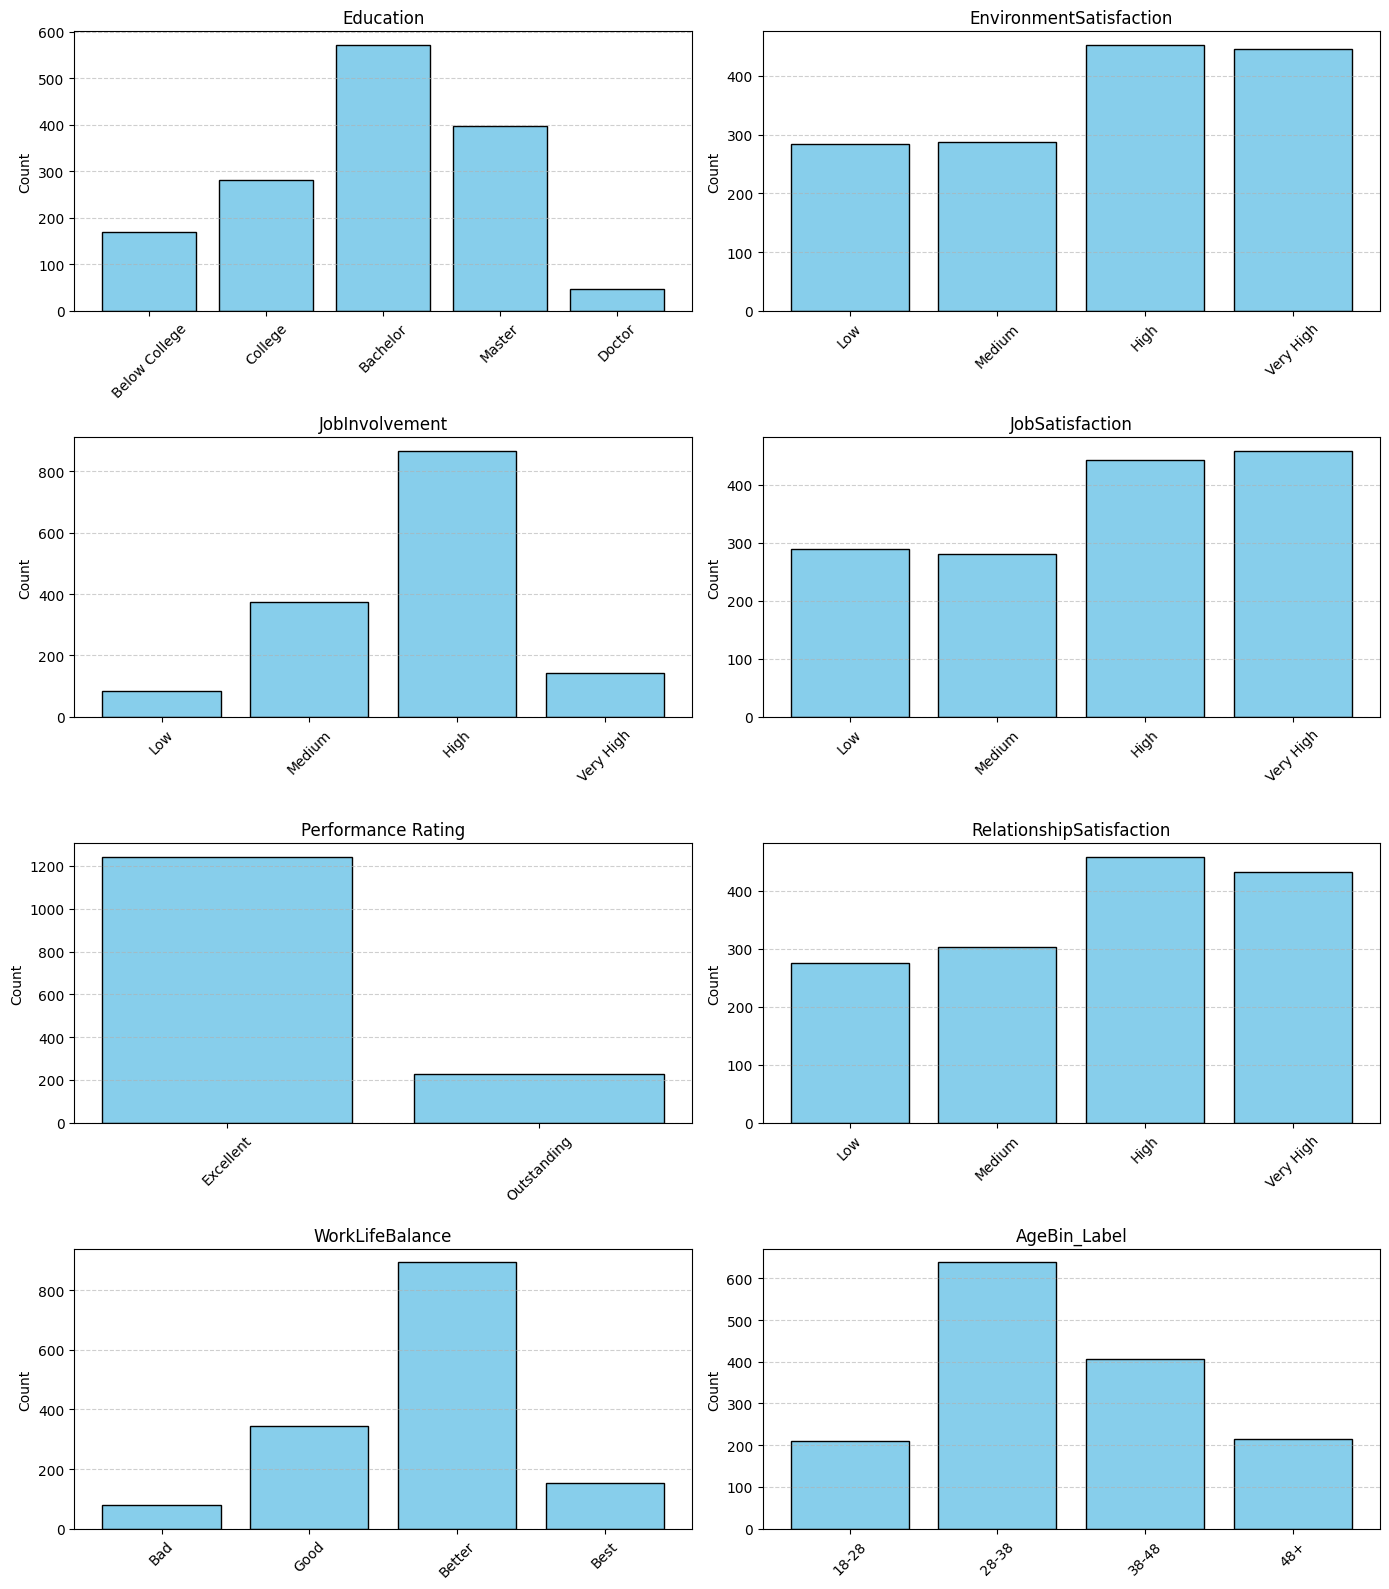

In [ ]:
import matplotlib.pyplot as plt

# Define ordered mappings
ordered_mappings = {
    'Education_DS': [education_map[i] for i in sorted(education_map)],
    'EnvironmentSatisfaction_DS': [environment_satisfaction_map[i] for i in sorted(environment_satisfaction_map)],
    'JobInvolvement_DS': [job_involvement_map[i] for i in sorted(job_involvement_map)],
    'JobSatisfaction_DS': [job_satisfaction_map[i] for i in sorted(job_satisfaction_map)],
    'PerformanceRating_DS': [performance_rating_map[i] for i in sorted(performance_rating_map)],
    'RelationshipSatisfaction_DS': [relationship_satisfaction_map[i] for i in sorted(relationship_satisfaction_map)],
    'WorkLifeBalance_DS': [work_life_balance_map[i] for i in sorted(work_life_balance_map)],
    'AgeBin_Label': [bin_labels[i] for i in sorted(bin_labels)]
}

# Prepare plot
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

# Plot each chart
for idx, (col, order) in enumerate(ordered_mappings.items()):
    counts = df[col].value_counts().reindex(order)
    axes[idx].bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    axes[idx].set_title(col.replace('_DS', '').replace('Rating', ' Rating'))
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.6)

# Hide the 8th subplot (bottom right) if unused
if len(ordered_mappings) < len(axes):
    for i in range(len(ordered_mappings), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
